# DTSA5509 Final Project #
## Project Topic ##
A dataset about heart attack risk was chosen. *The objective is to create a model that can predict, when given a set of inputs, whether a person is in a high risk category of experiencing a heart attack.* 
We will be trying to model the data with multiple machine learning algorithms: 
1. 'Traditional' Logistic Regression, 
2. (Pruned) Decision Tree, 
3. Ensemble method, AdaBoost and 
4. Support Vector Machine model. 

If a method has hyperparameters or other tuning paramameters, best effort is made to get the best result. 
## Data ##
The data set consists of the occurence of a heart attack and 13 associated risk factors. The plan is to train a model using the risk factors as labels and whether hear attack happened or not as a target. This is a binary classifier dataset. The thirteen features fall in three categories: binary (3), categorical (5) and continuous (5). 

## Data Cleaning ##
In the code below, basic information about the dataset is printed out: Size of the dataset, data types of the variables. Also, a couple of first rows of the dataset is printed out to show how the dataset looks. 

Descriptive statistics show if there're unreasonable values (min and max values) that are probably invalid data entries. It also shows means and standard deviations.

Another check for invalid values shows that the data set is clean. However, when looking for duplicate entries, one row was found to be a duplicate and thus removed.

Finally, we checked how evenly the output variable is distributed. The response/target variable is distributed evenly between had not heart attack and had heart attack which makes

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = r'C:\Users\nikok\OneDrive\Documents\Opiskelu\MSEE\24 DTSA 5509 Introduction to Machine Learning Supervised Learning\Week 7\Datasets\Heart Attack Analysis & Prediction Dataset'
datafile = 'heart.csv'

df = pd.read_csv(path+'\\'+datafile)

print('\n*** Dataframe info ***')
print(df.info())
print('\n*** Five first rows ***')
print(df.head(5))
#print(df.columns[0])
#print('\nDatatypes in the dataframe:')
#print(df.dtypes)
print('\n*** Descriptive statistics ***')
print(df.describe())

#for c in df.columns[0:]:
#    print(c, df[c].unique())

#df['age'] = pd.to_numeric(df['age'], errors='coerce')
print('\n*** Any NaN values ***') 
print(df.isna().any()) 

print('\n*** Any duplicate rows? If so, remove them. ***')
print('Duplicate rows found:')
print(df[df.duplicated(keep='last')])
before = len(df)
#print(df.loc[163:164])
df = df.drop_duplicates()
print('Number of rows before', before, 'and after', len(df), 'removing duplicates.')

print('\n*** Balance of the response variable ***')
print('Number of more chance of heart attack:', sum(df.output==1), '('+str(round(sum(df.output==1)/len(df)*100))+'%)')
print('Number of less chance of heart attack:', sum(df.output==0), '('+str(round(sum(df.output==0)/len(df)*100))+'%)')


*** Dataframe info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

*** Five first rows ***
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1

### Dataset info ###

 Feature explanations as stated on the Kaggle page

0. Age: Age of the patient
    * Real-valued
1. Sex: Sex of the patient
    * Binary-valued
2. cp: Chest Pain type chest pain type
    * Categorical values
        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic
3. trtbps: resting blood pressure (in mm Hg)
    * Real-valued
4. chol: cholestoral in mg/dl fetched via BMI sensor
    * Real-valued
5. fbs: (fasting blood sugar > 120 mg/dl) 
    * Binary-valued
        * Value 1: true
        * Value 0: false
6. rest_ecg: resting electrocardiographic results
    * Categorical values
        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
7. thalach: maximum heart rate achieved
    * Real-valued
8. exang: exercise induced angina
    * Binary-valued
        * Value 1: Yes
        * Value 0: No
9. oldpeak: Previous peak
    * Real-valued
10. slp: Slope
    * Categorical values
11. ca: number of major vessels (0-3)
    * Categorical values
12. thall: Thal rate
    * Categorical values
13. target: 
    * Binary-valued
        * Value 0: less chance of heart attack 
        * Value 1: more chance of heart attack

## Exploratory Data Analysis ##

In [305]:
df_cat = df.copy()

#df_cat = df.select_dtypes(include = 'object').copy()
df_cat = df_cat.astype({'sex':'category', 'cp':'category', 'fbs':'category', 'restecg':'category', 'exng':'category', 'slp':'category', 'caa':'category', 'thall':'category', 'output':'category'})
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    category
 12  thall     302 non-null    category
 13  output    302 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 18.2 KB


#### Binary features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Feature  3 non-null      object
 1   Zeros    3 non-null      int64 
 2   Ones     3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
None


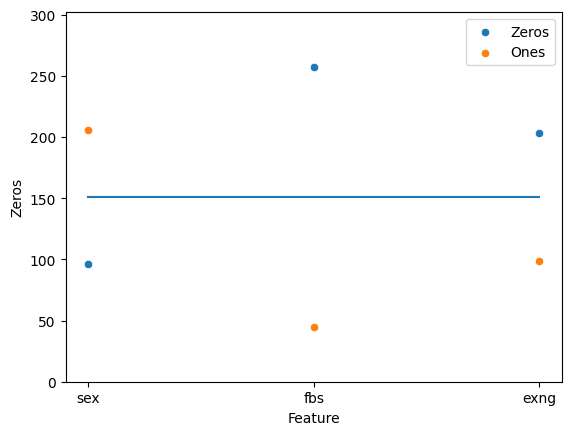

In [306]:
bin_features = ['sex', 'fbs', 'exng']
zeros = []
ones = []

for ftr in bin_features:
    zeros.append(sum(df_cat[ftr]==0))
    ones.append(sum(df_cat[ftr]==1))
df_bin = pd.DataFrame(np.transpose([bin_features, zeros, ones]), columns=['Feature', 'Zeros', 'Ones'])
df_bin = df_bin.astype({'Zeros':'int64', 'Ones':'int64'})
print(df_bin.info())
sns.scatterplot(data=df_bin, x="Feature", y='Zeros')
sns.scatterplot(data=df_bin, x="Feature", y='Ones')
sns.lineplot(x=bin_features, y=[len(df_cat)/2, len(df_cat)/2, len(df_cat)/2])
plt.legend(['Zeros','Ones'])
plt.ylim(0, len(df_cat))
plt.show()


#### Categorical features

#### Real-valued features

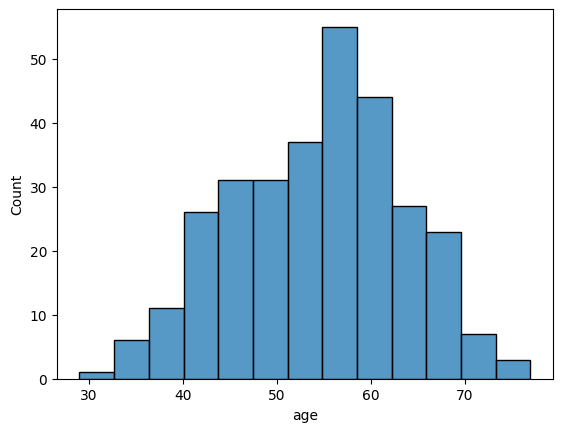

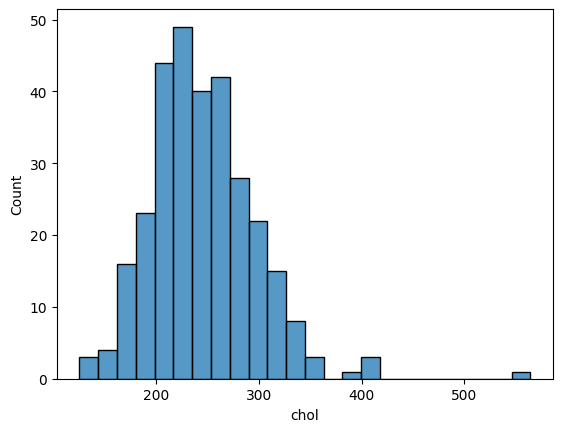

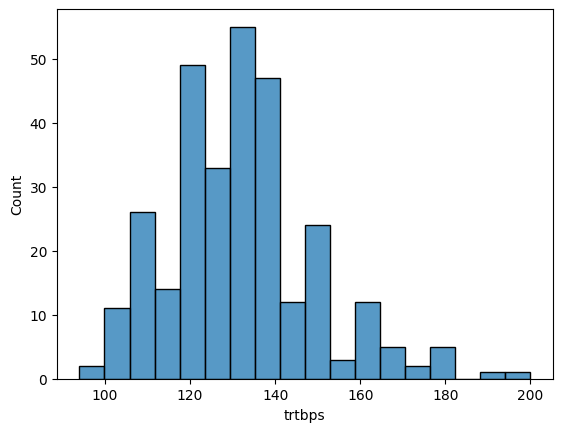

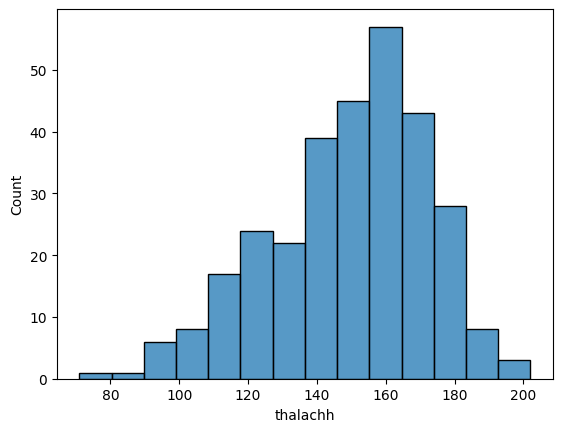

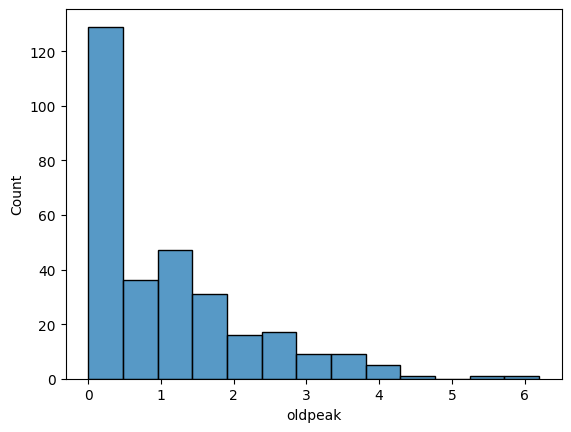

In [307]:
sns.histplot(data=df_cat, x="age", multiple="stack")
plt.show()
sns.histplot(data=df_cat, x="chol", multiple="stack")
plt.show()
sns.histplot(data=df_cat, x="trtbps", multiple="stack")
plt.show()
sns.histplot(data=df_cat, x="thalachh", multiple="stack")
plt.show()
sns.histplot(data=df_cat, x="oldpeak", multiple="stack")
plt.show()
  


The 'oldpeak' feature in the histogram above looks suspicious. It has a lot of zero values for a real-valued feature; maybe suggesting that there's no available data about the previous peak measurement. 

One option is to drop the feature out from the model. Another option is to impute the missing values which is done below by replacing the zero values with the group mean. 

Before: Number of zero values in "oldpeak" column 0 out of 302
1.2622472698565854


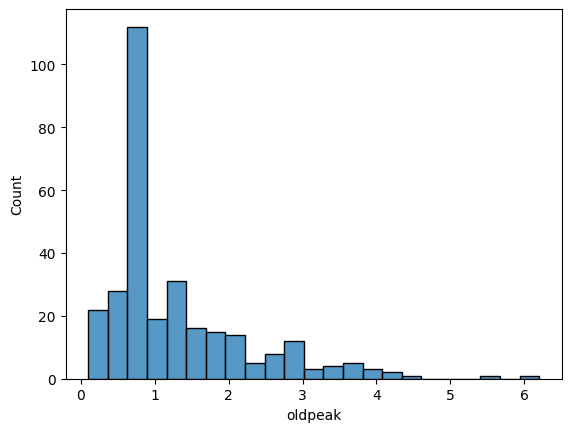

After: Number of zero values in "oldpeak" column 0 out of 302


In [312]:
print('Before: Number of zero values in "oldpeak" column', sum(df_cat['oldpeak']==0), 'out of', len(df_cat['oldpeak']))
# Impute zero values with the mean
oldpeak_mean = np.mean(df_cat.loc[df_cat['oldpeak']!=0, 'oldpeak'])
df_cat.loc[df_cat['oldpeak']==0, 'oldpeak'] = oldpeak_mean
print(oldpeak_mean, np.mean(df_cat['oldpeak']))
sns.histplot(data=df_cat, x="oldpeak")
plt.show()
print('After: Number of zero values in "oldpeak" column', sum(df_cat['oldpeak']==0), 'out of', len(df_cat['oldpeak']))


Correlation analysis plotted in the heatmap shows no significant correlation between the data labels. 


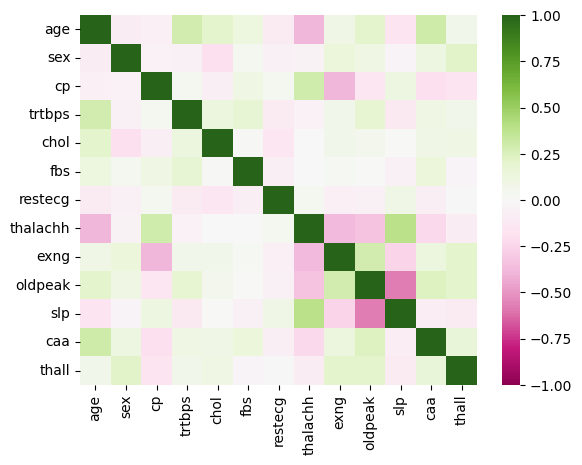

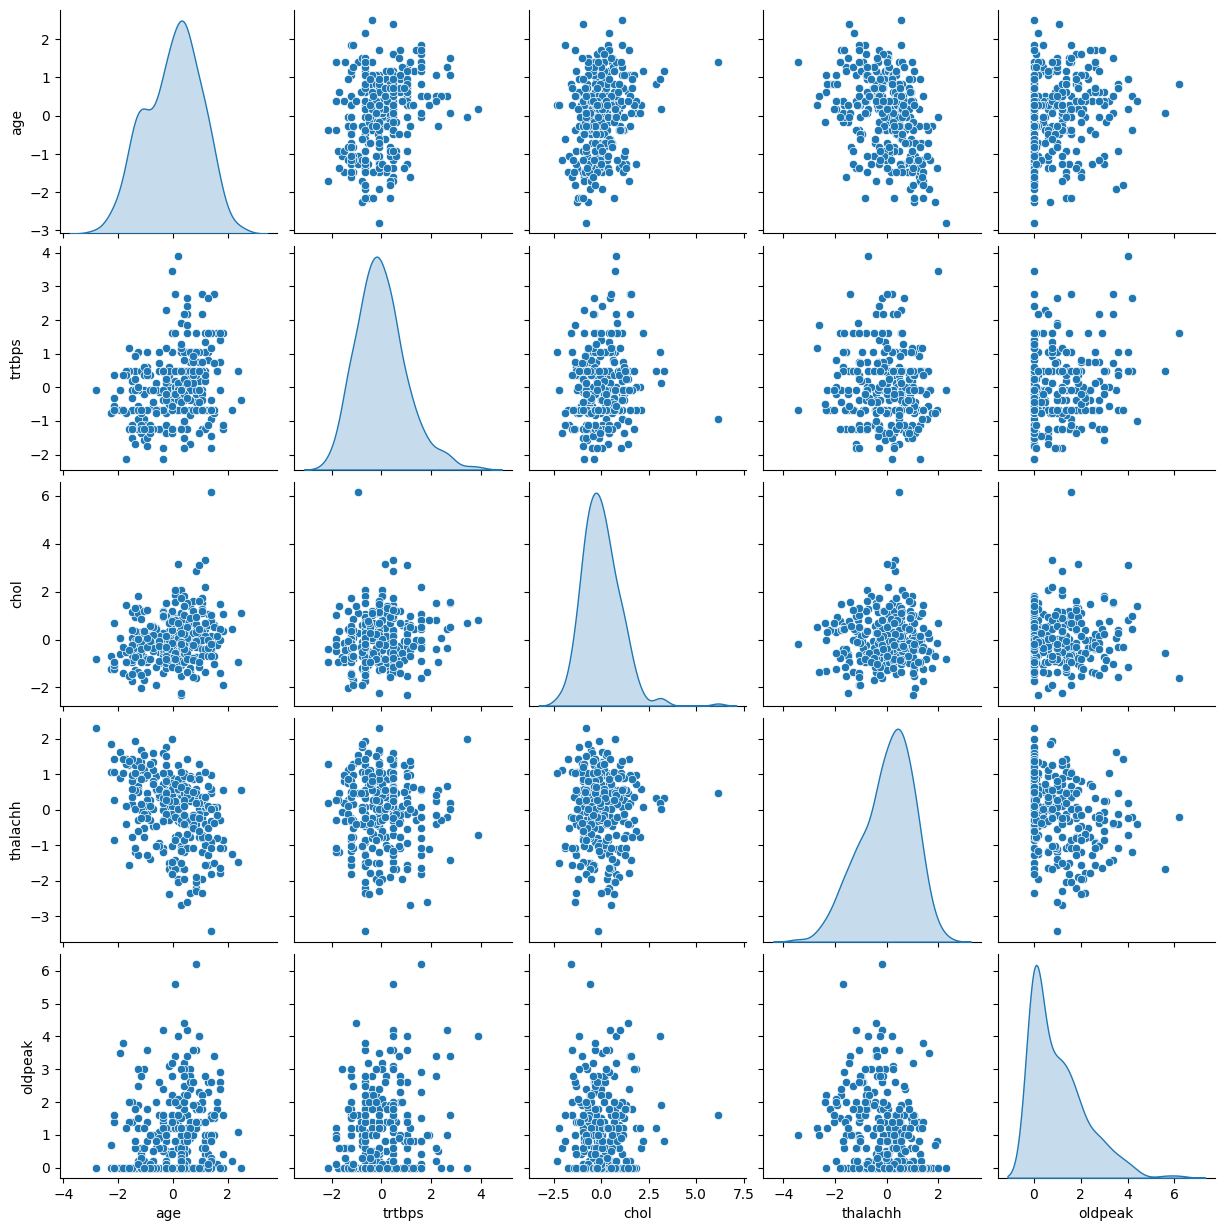

Number of zero values in "oldpeak" column 98 out of 302


In [227]:
sns.heatmap(df.drop(columns='output').corr(),vmin=-1, vmax=1, cmap='PiYG')
plt.show()

sns.pairplot(df_cat.select_dtypes(['float64', 'int64']), diag_kind='kde')
#sns.pairplot(df_cat.select_dtypes('float64').corr(), diag_kind='kde')
plt.show()


### Prepare training and test sets ###

Making a 80-20 split for training and test sets. 

Also, normalization performed for the real-valued features: 'age', 'trtbps', 'chol' and 'thalachh'.

In [233]:
from sklearn.model_selection import train_test_split

test_split = 0.2 # 20/80 split test/train

columns = ['age', 'trtbps', 'chol', 'thalachh']
for column in columns:
    df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])
    df_cat[column] = (df_cat[column] - np.mean(df_cat[column])) / np.std(df_cat[column])
    
df_train, df_test = train_test_split(df, test_size=test_split, random_state=124)

df_cat_no_old = df_cat.drop(columns='oldpeak', inplace=False)
df_train, df_test = train_test_split(df_cat_no_old, test_size=test_split, random_state=124)
df_train, df_test = train_test_split(df_cat, test_size=test_split, random_state=124)

print('The length of training set:', len(df_train), '\nThe length of testing set:', len(df_test))
y_train = df_train['output']
X_train = df_train.drop(columns='output', inplace=False)
y_test = df_test['output']
X_test = df_test.drop(columns='output', inplace=False)


The length of training set: 241 
The length of testing set: 61


## Models ##
### Logistic regression model


In [234]:
from sklearn.linear_model import LogisticRegression
myLogReg = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear').fit(X_train, y_train)
myLogReg.score(X_test, y_test)


0.8360655737704918

Accuracy: 0.836
F1-score: 0.853
Precision: 0.829
Recall: 0.879
Confusion matrix:


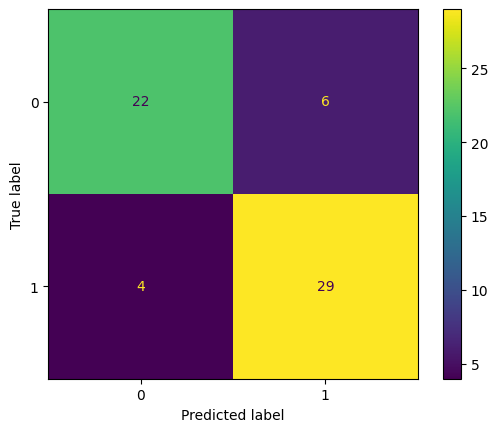

In [235]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

class calc_metrics:
    def __init__(self, y_test, y_pred):
        self.confusion_matrix = None
        self.recall = None
        self.f1_score = None
        self.precision = None
        self.recall = None

        self.get_metrics(y_test, y_pred)

    def get_metrics(self, y_test, y_pred):
        conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
        self.confusion_matrix = pd.DataFrame(conf_mat)
        self.accuracy = accuracy_score(y_test, y_pred)
        self.f1_score = f1_score(y_test, y_pred)
        self.precision = precision_score(y_test, y_pred)
        self.recall = recall_score(y_test, y_pred)
        print('Accuracy:', round(self.accuracy, 3))
        print('F1-score:', round(self.f1_score,3))
        print('Precision:', round(self.precision,3))
        print('Recall:', round(self.recall,3))
        print('Confusion matrix:')
        #print(self.confusion_matrix)
        disp = ConfusionMatrixDisplay(conf_mat)
        disp.plot()
        plt.show()

y_hat_LogReg = myLogReg.predict(X_test)
LogReg_metrics = calc_metrics(y_test, y_hat_LogReg)


## Decision Tree ##
Decision tree hyperparameters:
* Max depth
* CCP alpha
* Minimum number of samples per leaf

Best parameters: {'ccp_alpha': 0, 'max_depth': 3, 'min_samples_leaf': 1}
Validation accuracy: 0.7800411522633744
Accuracy: 0.77
F1-score: 0.8
Precision: 0.757
Recall: 0.848
Confusion matrix:


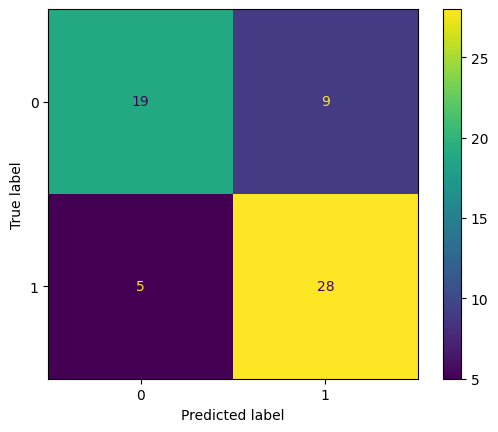

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

DT_grid_paras = {'max_depth':range(1,10), 'ccp_alpha':range(0, 9), 'min_samples_leaf':range(1,9)}
myDT_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=DT_grid_paras, scoring=None, n_jobs=None, refit=True, cv=3, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
myDT_grid = myDT_grid.fit(X_train, y_train)
print('Best parameters:', myDT_grid.best_params_)
print('Validation accuracy:', myDT_grid.best_score_)

##myDT = DecisionTreeClassifier(random_state=0, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, ccp_alpha=ccp_alpha)
myDT = myDT_grid.best_estimator_
myDT.fit(X_train, y_train)
y_hat_DT = myDT.predict(X_test)
DT_metrics = calc_metrics(y_test, y_hat_DT)


#RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)



## AdaBoost ##
Since AdaBoost algorithm was already coded as a part of the homework, AdaBoostClassifier from sklearn is used here. 

Accuracy: 0.839
F1-score: 0.848
Precision: 0.824
Recall: 0.875
Confusion matrix:


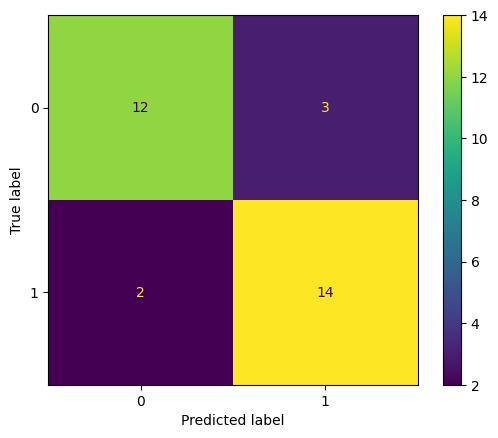

In [221]:
from sklearn.ensemble import AdaBoostClassifier

myAdaBoost = AdaBoostClassifier(estimator=None, n_estimators=500, learning_rate=0.10, algorithm='SAMME', random_state=None)
myAdaBoost.fit(X_train, y_train)

y_hat_AdaBoost = myAdaBoost.predict(X_test)
AdaBoost_metrics = calc_metrics(y_test, y_hat_AdaBoost)


## SVM ##
Support Vector Machine -model. Trying with two kernels: 'rbf', the radial basis function and 'linear', linear hyperplane function. 

Hyperparameters C and gamma are swept using grid search when using the radial basis function.

Only hyperparameter C is swept when using the linear function (does not have gamma parameter). 


Try Radial Basis Function kernel:
Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.125)}
Validation accuracy: 0.8190883190883191
Accuracy: 0.839
F1-score: 0.857
Precision: 0.789
Recall: 0.938
Confusion matrix:


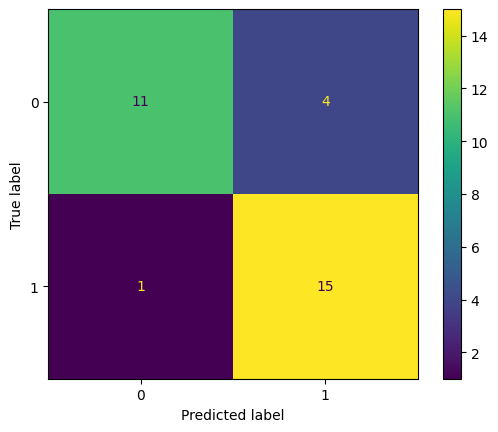

In [222]:
from sklearn.svm import SVC

print('\nTry Radial Basis Function kernel:')
SVC_grid_paras = {'C':np.logspace(-5, 5, num=11 , base=2), 'gamma':np.logspace(-5, 5, num=11 , base=2)}
my_SVC_grid = GridSearchCV(estimator=SVC(), param_grid=SVC_grid_paras, scoring=None, n_jobs=None, refit=True, cv=3, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
my_SVC_grid = my_SVC_grid.fit(X_train, y_train)
print('Best parameters:', my_SVC_grid.best_params_)
print('Validation accuracy:', my_SVC_grid.best_score_)
y_hat_SVC = my_SVC_grid.predict(X_test)
calc_metrics(y_test, y_hat_SVC)



Try Linear kernel:
Best parameters: {'C': np.float64(0.125)}
Validation accuracy: 0.8191290191290191
Accuracy: 0.871
F1-score: 0.882
Precision: 0.833
Recall: 0.938
Confusion matrix:


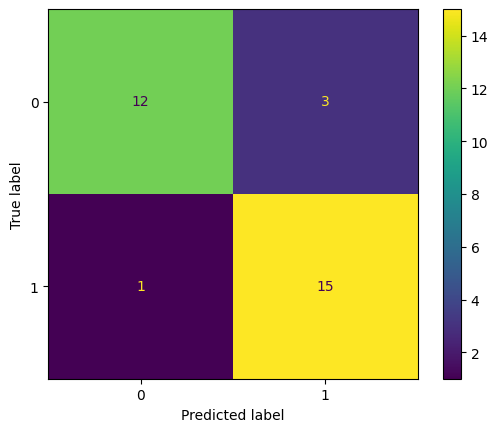

In [223]:
print('\nTry Linear kernel:')
SVC_grid_paras = {'C':np.logspace(-5, 5, num=11 , base=2)}
my_linSVC_grid = GridSearchCV(estimator=SVC(kernel='linear'), param_grid=SVC_grid_paras, scoring=None, n_jobs=None, refit=True, cv=3, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
my_linSVC_grid = my_linSVC_grid.fit(X_train, y_train)
print('Best parameters:', my_linSVC_grid.best_params_)
print('Validation accuracy:', my_linSVC_grid.best_score_)
y_hat_linSVC = my_linSVC_grid.best_estimator_.predict(X_test)
SVC_metrics = calc_metrics(y_test, y_hat_linSVC)

## Results and Analysis ##



Logistic Regression accuracy: 0.839
Decision Tree accuracy: 0.774
AdaBoost accuracy: 0.839
Support Vector Machine accuracy: 0.871

Logistic Regression recall: 0.875
Decision Tree recall: 0.875
AdaBoost recall: 0.875
Support Vector Machine recall: 0.938


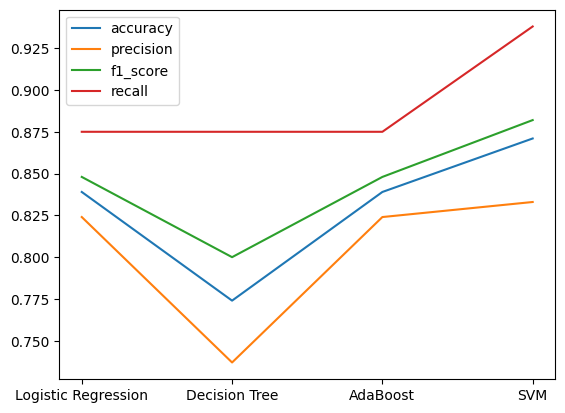

In [224]:
print('Logistic Regression accuracy:',round(LogReg_metrics.accuracy,3))
print('Decision Tree accuracy:',round(DT_metrics.accuracy,3))
print('AdaBoost accuracy:',round(AdaBoost_metrics.accuracy,3))
print('Support Vector Machine accuracy:',round(SVC_metrics.accuracy,3))
print()
print('Logistic Regression recall:',round(LogReg_metrics.recall,3))
print('Decision Tree recall:',round(DT_metrics.recall,3))
print('AdaBoost recall:',round(AdaBoost_metrics.recall,3))
print('Support Vector Machine recall:',round(SVC_metrics.recall,3))

#LogReg_metrics.accuracy
df_results = pd.DataFrame(np.round([[LogReg_metrics.accuracy, DT_metrics.accuracy, AdaBoost_metrics.accuracy, SVC_metrics.accuracy],
              [LogReg_metrics.precision, DT_metrics.precision, AdaBoost_metrics.precision, SVC_metrics.precision],
              [LogReg_metrics.f1_score, DT_metrics.f1_score, AdaBoost_metrics.f1_score, SVC_metrics.f1_score],
              [LogReg_metrics.recall, DT_metrics.recall, AdaBoost_metrics.recall, SVC_metrics.recall]],3), 
              index=['accuracy', 'precision', 'f1_score', 'recall'], columns=['Logistic Regression', 'Decision Tree', 'AdaBoost', 'SVM'])

plt.plot(df_results.transpose())
plt.legend(df_results.index)
plt.show()

## Discussion and conclusion ##
When evaluating the model options, one should be close attention to false positives. Considering the type of data and we want to predict heart conditions, we do not want to miss any potentially positive cases. 